# Máquina de soporte vectorial

In [2]:
import pandas as pd
import numpy as np

In [22]:
df = pd.read_csv("loan.csv")
df.head(4)

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved


In [23]:
# borramos las columnas no relevantes para nuestros intereses
df.drop(columns=["occupation","education_level"], inplace=True)

# codificamos la variable genero
d = {'Male': 1, 'Female':0}
df['gender'] = df['gender'].map(d)

# codificamos la variable estado civil
d2 = {"Married": 0, "Single":1}
df['marital_status'] = df['marital_status'].map(d2)

# codificamos la variable objetivo
df["loan_status"] = np.where(df["loan_status"] == "Approved", 1,0)

In [24]:
df.columns

Index(['age', 'gender', 'marital_status', 'income', 'credit_score',
       'loan_status'],
      dtype='object')

In [25]:
df.head(3)

,age,gender,marital_status,income,credit_score,loan_status
0,32,1,0,85000,720,1
1,45,0,1,62000,680,1
2,28,1,1,25000,590,0


In [26]:
# seleccionamos las variables descriptivas y la etiqueta
X = df.iloc[:, [0,3]].values
y = df.iloc[:, 5].values

# se separan los datos en conjunto de entrenamiento y pruebas
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 47)

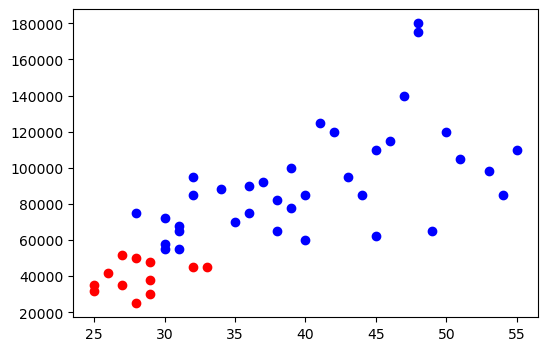

In [27]:
X_0 = X_train[y_train == 0]
X_1 = X_train[y_train == 1]

import matplotlib.pyplot as plt 
plt.figure(figsize=(6,4)) #change figure-size for easier viewing
plt.scatter(X_0[:,0],X_0[:,1], color = 'red')
plt.scatter(X_1[:,0],X_1[:,1], color = 'blue')

In [28]:
from sklearn import svm
# Creamos un objeto SVM
modelo = svm.SVC(kernel='linear')

# Entrenamos el modelo usando el conjunto de entrenamiento
modelo.fit(X_train, y_train)

# Realizamos una predicción con los datos de prueba
predicciones = modelo.predict(X_test)

In [29]:
# Obtenemos la exactitud del modelo
from sklearn.metrics import accuracy_score
print(f"Exactitud: {accuracy_score(y_test, predicciones):.2f}")

Exactitud: 1.00


In [30]:
# Ver vectores de soporte
modelo.support_vectors_

array([[2.7e+01, 5.2e+04],
       [3.0e+01, 5.5e+04]])

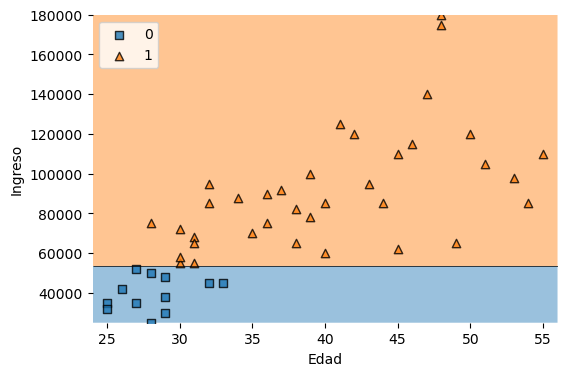

In [31]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(6, 4))
plot_decision_regions(X_train, y_train, clf=modelo)
plt.legend(loc='upper left')
plt.xlabel('Edad')
plt.ylabel('Ingreso')
plt.show()

Aplicación de SVM con Kernel de Base Radial

In [32]:
from sklearn import svm
# Creamos un objeto SVM
modelo = svm.SVC(kernel='rbf', C=100, gamma='auto')

# Entrenamos el modelo usando el conjunto de entrenamiento
modelo.fit(X_train, y_train)

# Realizamos una predicción con los datos de prueba
predicciones = modelo.predict(X_test)

In [33]:
# Obtenemos la exactitud del modelo
from sklearn.metrics import accuracy_score
print(f"Exactitud: {accuracy_score(y_test, predicciones):.2f}")

Exactitud: 0.69


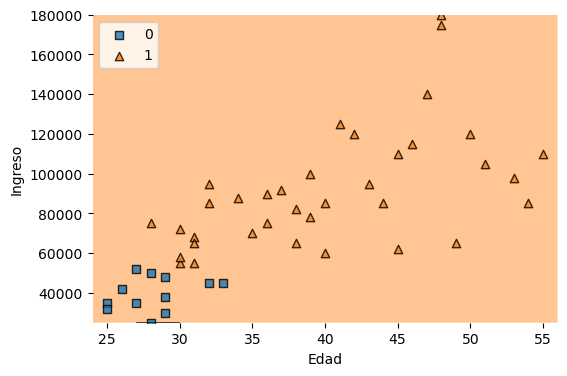

In [18]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(6, 4))
plot_decision_regions(X_train, y_train, clf=modelo)
plt.legend(loc='upper left')
plt.xlabel('Edad')
plt.ylabel('Ingreso')
plt.show()

Utilizar los mejores hiperparámetros con GridSearchCV 

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
model = svm.SVC()
 
grilla = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.01, 0.25, 0.5, 0.75, 1.0],
    'kernel': ['rbf', 'poly']
}
 
busqueda = GridSearchCV(estimator=modelo, param_grid=grilla, cv=5, verbose=1)
busqueda.fit(X_train, y_train) # Entrenar el modelo con diferentes combinaciones

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=SVC(C=100, gamma='auto'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.25, 0.5, 0.75, 1.0],
                         'kernel': ['rbf', 'poly']},
             verbose=1)

In [35]:
mejor_modelo = busqueda.best_estimator_
print(mejor_modelo)

SVC(C=0.01, gamma=0.01, kernel='poly')


In [21]:
from sklearn import svm
# Creamos un objeto SVM
modelo = svm.SVC(kernel='rbf', C=10, gamma=0.5)

# Entrenamos el modelo usando el conjunto de entrenamiento
modelo.fit(X_train, y_train)

# Realizamos una predicción con los datos de prueba
predicciones = modelo.predict(X_test)

# Obtenemos la exactitud del modelo
from sklearn.metrics import accuracy_score
print(f"Exactitud: {accuracy_score(y_test, predicciones):.2f}")

Exactitud: 0.69


# Multinomial Naive Bayes

La distribución multinomial describe la probabilidad de observar un conteo sobre un número de categorías, por tanto éste modelo es apropiado para 'features' que representan conteos o ratas de conteos, por ejemplo la cantidad de palabras en un parrafo.

## Clasificación de mensajes 

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Dataset de https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
df = pd.read_table('https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s09/dataset/SMSSpamCollection', 
                   sep='\t', 
                   names=['label','sms_message'])
# Visualización de las 5 primeras filas
df.head()

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
# Conversion
df['label'] = df.label.map({'ham':0, 'spam':1})

df.head()

,label,sms_message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Debemos encontrar una forma de contar las palabras dentro del cada mensaje para poder entrenar un algoritmo en sklearn.

<b>Algoritmo "Bag of Words":</b>

Todo problema en el que se necesite procesar datos de texto se conoce con el término de "Bag of Words" o bolsa de palabras. La idea detrás de este problema es muy simple:

* Contar un fragmento de texto y contar la frecuencia de las palabras que aparecen

* En sklearn existe un contador de vectorización que opera de la siguiente forma:

* Separa la caddena en palabras y le asigna un ID entero a cada palabra.

* Cuenta cada una de las palabras.

* Convierte todas las palabras en minúsculas para tratarlas de forma igual.

* Ignora los caractéres especiales.

* Contiene un parámetro stop_words, que corresponde a las palabras más usadas en el lenguaje (por defecto, inglés).

Veamos un ejemplo de Bag of Words

In [7]:
# Importar la clase de contador de voctorización e instanciarla
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

#Visualización del objeto 'count_vector'
print(count_vector)

CountVectorizer()


In [11]:
lista_palabras = ['Hola, ¿cómo estás?', 'Gana dinero, Gana desde casa', '¿Cómo estás tu? llámame ya!', 'Hola, te llamo mañana. Mañana mejor']     

In [32]:
count_vector.fit(lista_palabras)
nombres = count_vector.vocabulary_
nombres

{'hola': 6,
 'cómo': 1,
 'estás': 4,
 'gana': 5,
 'dinero': 3,
 'desde': 2,
 'casa': 0,
 'tu': 12,
 'llámame': 8,
 'ya': 13,
 'te': 11,
 'llamo': 7,
 'mañana': 9,
 'mejor': 10}

In [19]:
fq_array = count_vector.transform(lista_palabras).toarray()
fq_array     

array([[0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 1, 0, 0]], dtype=int64)

In [33]:
df_frecuencias = pd.DataFrame(fq_array, columns=count_vector.get_feature_names_out(), index=[f"Frase {i+1}" for i in range(len(lista_palabras))])
df_frecuencias

,casa,cómo,desde,dinero,estás,gana,hola,llamo,llámame,mañana,mejor,te,tu,ya
Frase 1,0,1,0,0,1,0,1,0,0,0,0,0,0,0
Frase 2,1,0,1,1,0,2,0,0,0,0,0,0,0,0
Frase 3,0,1,0,0,1,0,0,0,1,0,0,0,1,1
Frase 4,0,0,0,0,0,0,1,1,0,2,1,1,0,0


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['sms_message'], df['label'], random_state=1)
print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5572
Number of rows in the training set: 4179
Number of rows in the test set: 1393


In [38]:
# Creación del objeto de la clase CountVectorizer()
count_vector = CountVectorizer()
# Ajuste de los datos de entrenamiento para obtener la matriz de frecuencias.
training_data = count_vector.fit_transform(X_train)
# Trandformación de los datos de test para obtener la matriz de frecuencias. 
#Nótese que no ajustamos los datos de test en CountVectorizer()
testing_data = count_vector.transform(X_test)

In [39]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB()

In [40]:
predictions = naive_bayes.predict(testing_data)

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.9885139985642498
Precision score:  0.9720670391061452
Recall score:  0.9405405405405406
F1 score:  0.9560439560439561


## Clasificación de textos

Uno de los usos más comunes de naive Bayes multinomial es la clasificación de texto, donde los 'features' están relacionados con el conteo de palabras o la frecuencia de ellas en un documento

In [42]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [43]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [44]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



Como hemos dicho, los modelos de machine learning son modelos matemáticos, por tanto debemos procesar nuestros datos para entregarlos al algorítmo. Convertiremos nuestros documentos a vectores usando TF-IDF, y creando un 'pipeline' que lo conecte con el estimador multinomial.

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [46]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

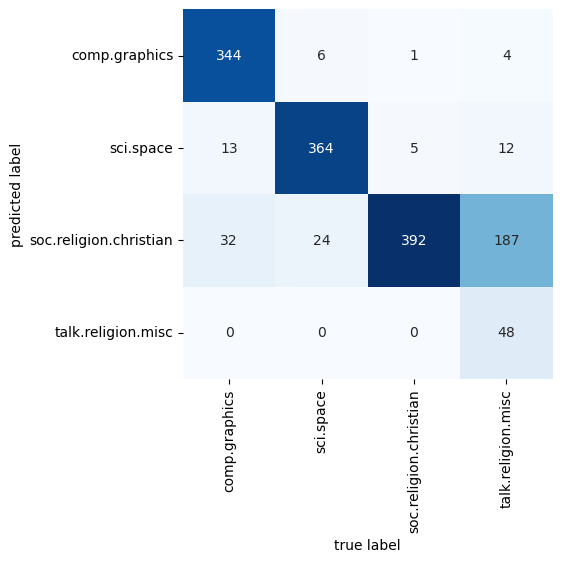

In [49]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap="Blues",
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [50]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [51]:
predict_category('sending a payload to the ISS')

'sci.space'

In [52]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [53]:
predict_category('determining the screen resolution')

'comp.graphics'